<a href="https://colab.research.google.com/github/zzhining/public_data_analysis/blob/main/w04_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 04. 공공데이터를 활용한 데이터 시각화(1)

## 실습 목표
---
- seaborn과 matplotlib을 활용한 데이터 시각화
    - 월평균 소득 분표
    - 전공별 월평균소득의 분포
    - 주당 정규 근로 시간에 따른 월평균 소득의 분포
    - 월평균 근로소득에 영향을 미치는 변수
    - 전공계열의 분포
    - 이직여부의 분포

## 데이터
---

* [고용조사분석시스템](https://survey.keis.or.kr/goms/gomsdownload/List.jsp)

- 대졸자들의 노동시장 진입과 정착 과정에 대한 실증적 자료가 요구됨에 따라  『대졸자직업이동경로조사』를 실시
- 대졸자의 교육과정, 구직활동, 일자리경험, 직업훈련, 자격증, 개인신상정보 및 가계배경 등 노동시장 진입 및 정착에 영향을 줄 수 있는 항목 조사
- GOMS2019.csv
    - shape: (11652, 130)
- GOMS2019_columns.csv
    - shape: (159, 3)


## 0. 환경셋팅
-----
한글 지원이 안되는 문제를 해결하기 위해 한글이 지원되는 폰트를 사용하도록 설정합니다.

In [25]:
# (라이브러리 설치 후 런타임 재시작 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (19.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


## 1. 데이터 읽기
---



### 1.1 라이브러리 불러오기
 - **numpy**: 수치형 데이터를 배열 구조로 처리하기 위한 라이브러리
 - **pandas**: 데이터프레임을 다루기 위한 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

### 1.2 데이터 불러오기
---
pandas를 사용하여 dataframe 형태로 데이터를 불러옵니다. 데이터프레임을 담을 변수는 `df`로 설정합니다.

In [3]:
# GOMS2019.csv 파일을 읽어오기
df = pd.read_csv('https://raw.githubusercontent.com/zzhining/public_data_analysis/main/dataset/GOMS2019.csv')
df_columns = pd.read_csv('https://raw.githubusercontent.com/zzhining/public_data_analysis/main/dataset/GOMS2019_columns.csv')

# 데이터프레임의 상위 5개 항목 출력
df.shape, df_columns.shape

((11652, 130), (159, 3))

### 1.3 데이터 전처리
----
데이터프레임 `df`의 컬럼명을 변경합니다.

In [4]:
df.columns

Index(['이직여부', 'majorcat', 'school', 'area', 'sex', 'age', 'graduy', 'a001',
       'industry', 'job',
       ...
       'p039', 'p041', 'p043', 'p045', 'r023', 'r024', 'r025', 'r026', 'r027',
       'wt'],
      dtype='object', length=130)

In [5]:
col_name = df_columns.loc[:, ['columns', 'desc']].values
df.rename(columns = dict(col_name), inplace = True)

In [6]:
df.columns

Index(['이직여부', '전공계열', '학교유형', '학교소재지', '성별', '연령', '졸업년', '현 일자리 시작년', '21',
       '10',
       ...
       '지난 해 소득_만원', '가족에게 경제적 지원을 받고 있는지 여부', '가족에게 경제적 지원을 하고 있는지 여부',
       '군 복무 경험', '전년도 월평균 생활비 지출액', '전년도 월평균 주거비 지출액', '전년도 월평균 공교육비 지출액',
       '전년도 월평균 사교육비 지출액', '생활비 충당 방식', 'wt'],
      dtype='object', length=130)

## 2. 데이터 시각화
----

In [9]:
# Matplotlib 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

### 2.1 월평균 근로소득 분포

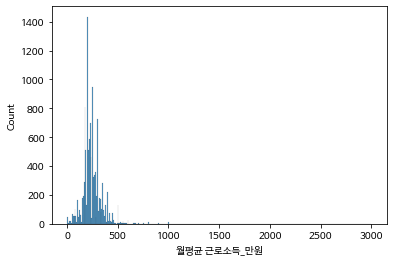

In [11]:
sns.histplot(df['월평균 근로소득_만원'])

극단치의 영향을 크게 받아 비교적 불균형한 분포를 띄고 있습니다. 그래서 월소득이 1,000만원 이하인 표본의 분포만 확인해보겠습니다.

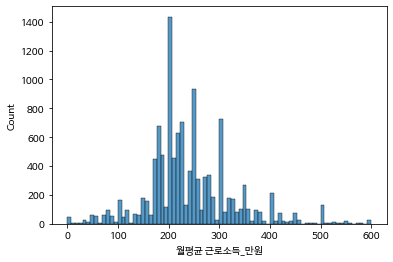

In [14]:
df_salary = df[df['월평균 근로소득_만원']<= 600]['월평균 근로소득_만원']
sns.histplot(df_salary)

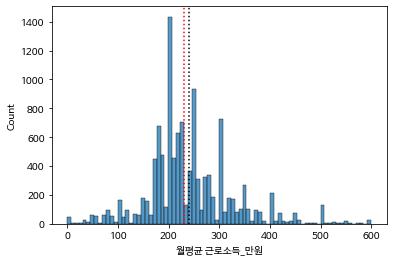

In [17]:
# 평균, 중앙값 표시
sns.histplot(df_salary)
plt.axvline(df_salary.mean(), ls = ":", color = 'black')
plt.axvline(df_salary.median(), ls = ":", color = 'red')

### 2.2 전공계열에 따른 월평균 근로소득 분포

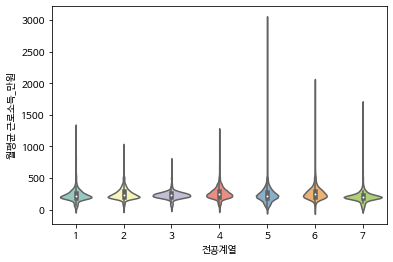

In [20]:
sns.violinplot(x = '전공계열', y = '월평균 근로소득_만원', data = df, palette = 'Set3')

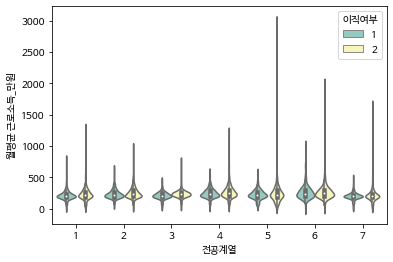

In [21]:
sns.violinplot(x = '전공계열', y = '월평균 근로소득_만원', hue = '이직여부', data = df, palette = 'Set3')

### 2.3 주당 정규 근로시간에 따른 월평균 근로소득 분포

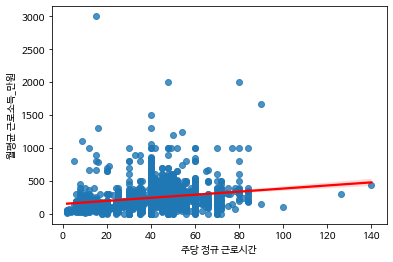

In [55]:
sns.regplot(x = '주당 정규 근로시간', y = '월평균 근로소득_만원', line_kws={'color': 'red'}, data = df)

### 2.4 월평균 근로소득에 영향을 미치는 변수

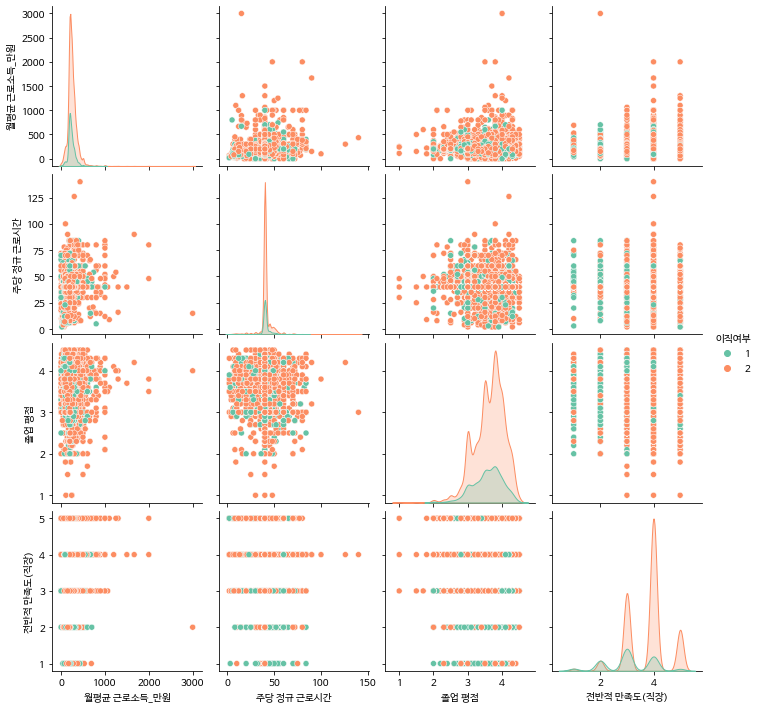

In [31]:
columns = ['월평균 근로소득_만원', '주당 정규 근로시간', '졸업 평점', '전반적 만족도(직장)']
sns.pairplot(data = df, x_vars = columns, y_vars = columns, hue = '이직여부', palette = 'Set2')

### 2.5 전공계열의 분포

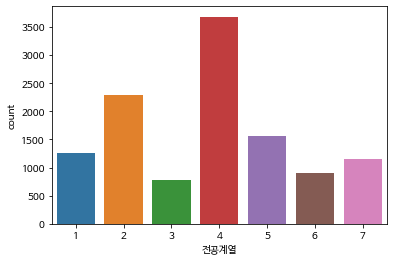

In [34]:
sns.countplot(x= df['전공계열'])

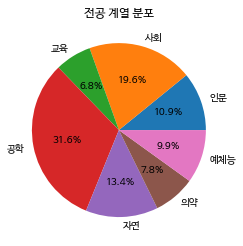

In [32]:
 # 파이차트를 위한 값 설정
df_major = df['전공계열'].value_counts(sort = False)

plt.pie(df_major, labels = ['인문','사회','교육','공학','자연','의약','예체능'], autopct='%.1f%%')
plt.title("전공 계열 분포")
plt.show()

### 2.6 이직여부의 분포

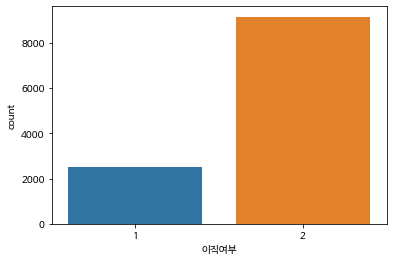

In [37]:
sns.countplot(x= df['이직여부'])

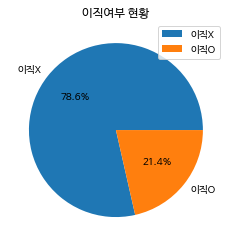

In [36]:
 # 파이차트를 위한 값 설정
df_turnover = df['이직여부'].value_counts(sort = False) 

plt.pie(df_turnover, labels = ['이직X', '이직O'], autopct='%.1f%%')
plt.title("이직여부 현황")
plt.legend(['이직X', '이직O'])
plt.show()